## Вариант 11. Построение и исследование регрессионной модели на основе химического эксперимента

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, f
import random

### Преобразуем данные к естественному формату

In [298]:
def to_natural_format(num_str: str):
    mantissa, exponent = num_str.split("e")
    return float(mantissa) * 10 ** int(exponent)

In [299]:
y_list = []
x_list = []
with open("Y_30.txt") as file:
    rows = file.readlines()[25:40]
#     rows = file.readlines()[44:59]

    for row in rows:
        y_list.append(to_natural_format(row.split()[0]))
#         y_list.append(to_natural_format(row.split()[5]))

with open("X.txt") as file:
    rows = file.readlines()
    for row in rows:
        row_split = row.split()
        nums = [to_natural_format(row_split[i]) for i in range(len(row_split))]
        x_list.append(nums)

X = np.array(x_list)
y = np.array(y_list)
n = y.shape[0]
m = X.shape[1]
print(f"n = {n}, m = {m}")
print()
print("Матрица Х:\n",X)
print()
print("Вектор наблюдений у:\n",y)

n = 15, m = 4

Матрица Х:
 [[252.36  96.67   8.37   1.  ]
 [262.54 100.07   9.07   1.  ]
 [285.7   96.78   9.35   1.  ]
 [277.52 101.3    9.67   1.  ]
 [307.95 100.35   9.45   1.  ]
 [322.44 104.8   10.12   1.  ]
 [334.88 106.17  10.35   1.  ]
 [350.11 109.2   11.03   1.  ]
 [346.1  104.48  10.38   1.  ]
 [374.91 106.88  12.15   1.  ]
 [378.49 113.14  12.98   1.  ]
 [397.48 112.38  11.34   1.  ]
 [378.39 109.07  10.95   1.  ]
 [393.44 114.45  12.89   1.  ]
 [403.84 115.23  13.71   1.  ]]

Вектор наблюдений у:
 [141.87305 149.40628 161.30455 160.22555 171.35829 179.62725 182.97827
 195.23086 191.41135 208.37234 215.25904 216.13533 204.68334 220.12231
 225.88958]


### МНК–оценка параметров регрессии

In [300]:
rank = np.linalg.matrix_rank(X)  # должен быть равен 4
print("Ранг матрицы X: ", rank)
X_T = X.T
X_T_X_inv = np.linalg.inv(np.matmul(X_T, X))
a_est = np.matmul(X_T_X_inv, X_T).dot(y)
print("Оценка параметров регрессии:", a_est)

Ранг матрицы X:  4
Оценка параметров регрессии: [0.41562877 0.01176349 3.94271963 4.10352525]


### Оценка дисперсии отклонений регрессионной модели

In [301]:
y_est = X.dot(a_est)
s_2_est = sum((y[i] - y_est[i])**2 for i in range(n)) / (n - m)
print("Оценка дисперсии:", s_2_est)

Оценка дисперсии: 1.8020646675870131


### Оценка матрицы ковариаций

In [302]:
cov_matrix_est = s_2_est * X_T_X_inv
print("Оценка матрицы ковариаций:\n", cov_matrix_est)

Оценка матрицы ковариаций:
 [[ 4.40168712e-04 -2.53169041e-03 -3.68477638e-03  1.59607763e-01]
 [-2.53169041e-03  3.94459165e-02 -6.95113053e-02 -2.57891480e+00]
 [-3.68477638e-03 -6.95113053e-02  4.13375217e-01  4.15798583e+00]
 [ 1.59607763e-01 -2.57891480e+00  4.15798583e+00  1.74891839e+02]]


### Находим стандартную ошибку оценки каждого коэффициента

In [303]:
s_i = np.diag(cov_matrix_est)**0.5
print("Стандартная ошибка оценки коэффициентов:", s_i)

Стандартная ошибка оценки коэффициентов: [ 0.0209802   0.19860996  0.64294262 13.22466784]


### Строим матрицу корреляций

In [304]:
corr_matrix_est = np.ones((m, m))
for i in range(m):
    for j in range(m):
        corr_matrix_est[i, j] = X_T_X_inv[i, j] / (X_T_X_inv[i, i] * X_T_X_inv[j, j])**0.5
        
print("Матрица корреляций:\n", corr_matrix_est)

Матрица корреляций:
 [[ 1.         -0.60757513 -0.27316769  0.57525401]
 [-0.60757513  1.         -0.54435498 -0.98186368]
 [-0.27316769 -0.54435498  1.          0.48901932]
 [ 0.57525401 -0.98186368  0.48901932  1.        ]]


### Строим гистограмму остатков

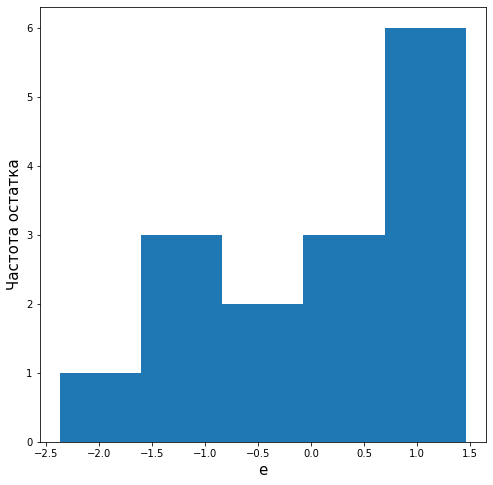

Вектор остатков: [-1.2562913  -0.75406177  0.45298633  1.4589884   0.8227186   0.37524805
 -2.36709533  0.8387758   1.30422859 -0.71589236  1.33675991  0.79526003
 -1.14577896  0.32581441 -1.47166041]


In [305]:
e = y - y_est
plt.figure(figsize=(8,8))
plt.hist(e, bins=5)
plt.xlabel("e", fontsize=15)
plt.ylabel("Частота остатка", fontsize=15)
plt.show()
print("Вектор остатков:", e)

### Cтроим графики регрессии и оцененной регрессии

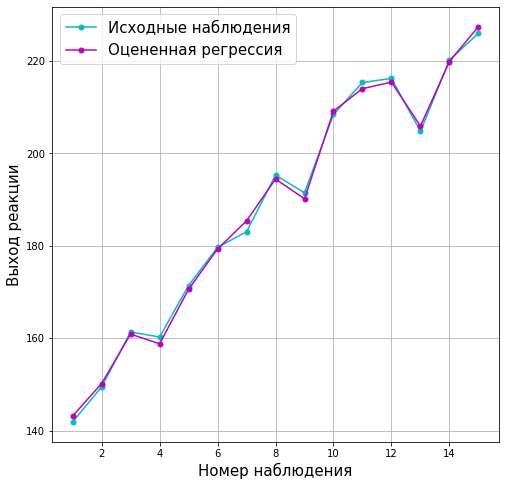

In [10]:
nums = np.arange(1, 16)

plt.figure(figsize=(8,8))
plt.plot(nums, y, '-o', markersize=5, color='c', label="Исходные наблюдения")
plt.plot(nums, y_est, '-o', markersize=5, color='m', label="Оцененная регрессия")
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Номер наблюдения", fontsize=15)
plt.ylabel("Выход реакции", fontsize=15)
plt.show()

### Находим коэффициент детерминации

In [11]:
y_mean = np.mean(y)
R = 1 - np.sum(e**2)/np.sum((y - y_mean)**2)
R_n = 1 - np.sum(e**2)/(n-m)/(np.sum((y - y_mean)**2)/(n-1))
print("Коэффициент детерминации")
print("\tСмещенный:", R)
print("\tНесмещенный:", R_n)

Коэффициент детерминации
	Смещенный: 0.9980626571363289
	Несмещенный: 0.9975342909007823


### Cтроим индивидуальные доверительные интервалы для коэффициентов регрессии

In [310]:
alpha = 0.1

t_quantile = t.ppf(1 - alpha/2, df=n - m)
print(f"Значение квантиля уровня {1-alpha/2} распределения Стьюдента: {t_quantile}")
a_intervals_l = np.array([a_est - s_i*t_quantile])[0]
a_intervals_r = np.array([a_est + s_i*t_quantile])[0]
print("\nИндивидуальные доверительные интервалы")
for i in range(m):
    print(f"{i+1}-й коэффициент: [{a_intervals_l[i]}, {a_intervals_r[i]}]")

print()
print(a_est)

Значение квантиля уровня 0.95 распределения Стьюдента: 1.7958848187036691

Индивидуальные доверительные интервалы
1-й коэффициент: [0.37795074968623615, 0.4533067881813631]
2-й коэффициент: [-0.3449171224005289, 0.36844410386679755]
3-й коэффициент: [2.7880687295137587, 5.097370523008928]
4-й коэффициент: [-19.646454954802216, 27.853505446655795]

[0.41562877 0.01176349 3.94271963 4.10352525]


### Строим обобщенную доверительную область для коэффициентов регрессии

In [311]:
t_quantile_turky = t.ppf(1 - alpha/(2*m), df=n - m)
print(f"Значение квантиля уровня {1-alpha/(m)} распределения Стьюдента: {t_quantile_turky}")
a_intervals_turky_l = np.array([a_est - s_i*t_quantile_turky])[0]
a_intervals_turky_r = np.array([a_est + s_i*t_quantile_turky])[0]
print("\nОбобщенная доверительная область")
for i in range(m):
    print(f"{i+1}-й коэффициент: [{a_intervals_turky_l[i]}, {a_intervals_turky_r[i]}]")

print()
print(a_est)

Значение квантиля уровня 0.975 распределения Стьюдента: 2.5930926824101492

Обобщенная доверительная область
1-й коэффициент: [0.36122517078484334, 0.4700323670827559]
2-й коэффициент: [-0.5032505448229411, 0.5267775262892097]
3-й коэффициент: [2.2755098141890224, 5.609929438333665]
4-й коэффициент: [-30.189264149303533, 38.39631464115711]

[0.41562877 0.01176349 3.94271963 4.10352525]


### График обобщенной доверительной области

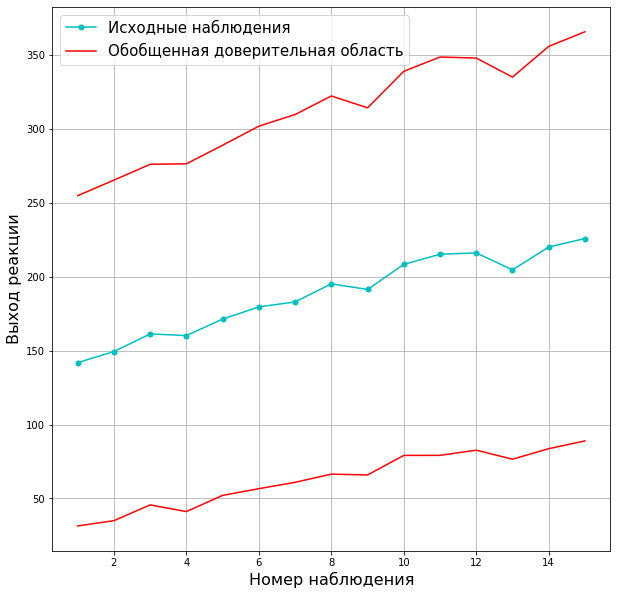

In [315]:
nums = np.arange(1, 16)
y_up = X.dot(a_intervals_turky_r)
y_low = X.dot(a_intervals_turky_l)

plt.figure(figsize=(10,10))
plt.plot(nums, y, '-o', markersize=5, color='c', label="Исходные наблюдения")
plt.plot(nums, y_up, color='r', label="Обобщенная доверительная область" )
plt.plot(nums, y_low, color='r')
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Номер наблюдения", fontsize=16)
plt.ylabel("Выход реакции", fontsize=16)
plt.show()

### Проверка гипотезы о равенстве коэффициентов нулю

In [316]:
print(f"Значение квантиля уровня {1-alpha/2} распределения Стьюдента: {t_quantile}")

t_zero = np.abs(a_est)/s_i <= t_quantile
print("\nПроверка принятия гипотезы")
for i in range(m):
    print(f"\t{np.abs(a_est[i])/s_i[i]} <= {t_quantile}? - {t_zero[i]}")

Значение квантиля уровня 0.95 распределения Стьюдента: 1.7958848187036691

Проверка принятия гипотезы
	19.8105264355948 <= 1.7958848187036691? - False
	0.05922910762374534 <= 1.7958848187036691? - True
	6.132304007343302 <= 1.7958848187036691? - False
	0.3102932562487339 <= 1.7958848187036691? - True


### Проверка гипотезы об адекватности модели среднего

In [69]:
f_quantile = f.ppf(1 - alpha, dfn=m-1, dfd=n-m)
print(f"Значение квантиля уровня {1-alpha} распределения Фишера: {f_quantile}")
t_mean = R**2/(1 - R**2)*(n - m)/(m - 1)
print("\nПроверка принятия гипотезы")
print(f"\t{t_mean} <= {f_quantile}? - {t_mean <= f_quantile}")

Значение квантиля уровня 0.9 распределения Фишера: 2.6602286837653133

Проверка принятия гипотезы
	943.5641964394616 <= 2.6602286837653133? - False


### Проверка гипотезы об идентичности двух регрессий

In [322]:
x1 = np.copy(X[:7, :])
y1 = np.copy(y[:7])
n1 = x1.shape[0]

x2 = np.copy(X[7:, :])
y2 = np.copy(y[7:])
n2 = x2.shape[0]

a1 =  np.matmul(np.linalg.inv(np.matmul(x1.T,x1)),x1.T).dot(y1)
y1_est = x1.dot(a1)
a2 = np.matmul(np.linalg.inv(np.matmul(x2.T,x2)),x2.T).dot(y2)
y2_est = x2.dot(a2)

Q_r = np.matmul((y - y_est).T, (y - y_est))
Q_1 = np.matmul((y1 - y1_est).T, (y1 - y1_est))
Q_2 = np.matmul((y2 - y2_est).T, (y2 - y2_est))

t_ident = (Q_r - Q_1 - Q_2)/m/((Q_1 + Q_2)/(n1 + n2 - 2*m))
f_quantile_ident = f.ppf(1 - alpha, dfn=m, dfd=n1 + n2 - 2*m)
print(f"Значение квантиля уровня {1-alpha} распределения Фишера: {f_quantile_ident}")
print(f"{t_ident} <= {f_quantile_ident}? {t_ident <= f_quantile_ident}")

Значение квантиля уровня 0.9 распределения Фишера: 2.9605340887350957
1.1896443223100994 <= 2.9605340887350957? True


### Примем второй и четвертый коэффициенты равными нулю

Посмотрим на оценки новых моделей

In [324]:
cropped_X = X[:, [0,2]]
cropped1_X = X[:, [0,2,3]] # убираем второй коэффициент
cropped_1_X = X[:, [0,1,2]] # убираем четвертый коэффициент

cropped_X_T = cropped_X.T
cropped1_X_T = cropped1_X.T
cropped_1_X_T = cropped_1_X.T

cropped_X_T_X_inv = np.linalg.inv(np.matmul(cropped_X_T, cropped_X))
cropped_a_est = np.matmul(cropped_X_T_X_inv, cropped_X_T).dot(y)
print("Оценка параметров регрессии(без 2го и 4го коэффициентов):", cropped_a_est)
cropped1_X_T_X_inv = np.linalg.inv(np.matmul(cropped1_X_T, cropped1_X))
cropped1_a_est = np.matmul(cropped1_X_T_X_inv, cropped1_X_T).dot(y)
print("Оценка параметров регрессии(без 2го коэффициента):", cropped1_a_est)
cropped_1_X_T_X_inv = np.linalg.inv(np.matmul(cropped_1_X_T, cropped_1_X))
cropped_1_a_est = np.matmul(cropped_1_X_T_X_inv, cropped_1_X_T).dot(y)
print("Оценка параметров регрессии(без 4го коэффициента):", cropped_1_a_est)

print("\nОценка дисперсии (полная модель):", s_2_est)
cropped_y_est = cropped_X.dot(cropped_a_est)
cropped_s_2_est = sum((y[i] - cropped_y_est[i])**2 for i in range(n)) / (n - m + 2)
print("Оценка дисперсии(без 2го и 4го коэффициентов):", cropped_s_2_est)
cropped1_y_est = cropped1_X.dot(cropped1_a_est)
cropped1_s_2_est = sum((y[i] - cropped1_y_est[i])**2 for i in range(n)) / (n - m + 1)
print("Оценка дисперсии(без 2го коэффициента):", cropped1_s_2_est)
cropped_1_y_est = cropped_1_X.dot(cropped_1_a_est)
cropped_1_s_2_est = sum((y[i] - cropped_1_y_est[i])**2 for i in range(n)) / (n - m + 1)
print("Оценка дисперсии(без 4го коэффициента):", cropped_1_s_2_est)

cropped_cov_matrix_est = cropped_s_2_est * cropped_X_T_X_inv
print("\nОценка матрицы ковариаций(без 2го и 4го коэффициентов):\n", cropped_cov_matrix_est)
cropped1_cov_matrix_est = cropped1_s_2_est * cropped1_X_T_X_inv
print("Оценка матрицы ковариаций(без 2го коэффициента):\n", cropped1_cov_matrix_est)
cropped_1_cov_matrix_est = cropped_1_s_2_est * cropped_1_X_T_X_inv
print("Оценка матрицы ковариаций(без 4го коэффициента):\n", cropped_1_cov_matrix_est)

cropped_s_i = np.diag(cropped_cov_matrix_est)**0.5
print("\nСтандартная ошибка оценки коэффициентов(без 2го и 4го коэффициентов):", cropped_s_i)
cropped1_s_i = np.diag(cropped1_cov_matrix_est)**0.5
print("Стандартная ошибка оценки коэффициентов(без 2го коэффициента):", cropped1_s_i)
cropped_1_s_i = np.diag(cropped_1_cov_matrix_est)**0.5
print("Стандартная ошибка оценки коэффициентов(без 4го коэффициента):", cropped_1_s_i)

cropped_corr_matrix_est = np.ones((m-2, m-2))
for i in range(m-2):
    for j in range(m-2):
        cropped_corr_matrix_est[i, j] = cropped_X_T_X_inv[i, j] / (cropped_X_T_X_inv[i, i] * cropped_X_T_X_inv[j, j])**0.5
print("\nМатрица корреляций(без 2го и 4го коэффициентов):\n", cropped_corr_matrix_est)
cropped1_corr_matrix_est = np.ones((m-1, m-1))
for i in range(m-1):
    for j in range(m-1):
        cropped1_corr_matrix_est[i, j] = cropped1_X_T_X_inv[i, j] / (cropped1_X_T_X_inv[i, i] * cropped1_X_T_X_inv[j, j])**0.5
print("\nМатрица корреляций(без 2го коэффициента):\n", cropped1_corr_matrix_est)
cropped_1_corr_matrix_est = np.ones((m-1, m-1))
for i in range(m-1):
    for j in range(m-1):
        cropped_1_corr_matrix_est[i, j] = cropped_1_X_T_X_inv[i, j] / (cropped_1_X_T_X_inv[i, i] * cropped_1_X_T_X_inv[j, j])**0.5
print("\nМатрица корреляций(без 4го коэффициента):\n", cropped_1_corr_matrix_est)

Оценка параметров регрессии(без 2го и 4го коэффициентов): [0.420965   4.26307861]
Оценка параметров регрессии(без 2го коэффициента): [0.41638377 3.96344916 4.87260461]
Оценка параметров регрессии(без 4го коэффициента): [0.41188386 0.07227313 3.8451599 ]

Оценка дисперсии (полная модель): 1.8020646675870131
Оценка дисперсии(без 2го и 4го коэффициентов): 2.04885876014246
Оценка дисперсии(без 2го коэффициента): 1.6524194286192488
Оценка дисперсии(без 4го коэффициента): 1.666351463529992

Оценка матрицы ковариаций(без 2го и 4го коэффициентов):
 [[ 0.00030939 -0.00967493]
 [-0.00967493  0.3036936 ]]
Оценка матрицы ковариаций(без 2го коэффициента):
 [[ 2.54622568e-04 -7.46964224e-03 -5.41955395e-03]
 [-7.46964224e-03  2.66727698e-01 -3.54458723e-01]
 [-5.41955395e-03 -3.54458723e-01  5.76424391e+00]]
Оценка матрицы ковариаций(без 4го коэффициента):
 [[ 2.72329875e-04 -1.64734557e-04 -6.91611758e-03]
 [-1.64734557e-04  1.31105578e-03 -7.58116803e-03]
 [-6.91611758e-03 -7.58116803e-03  2.90834

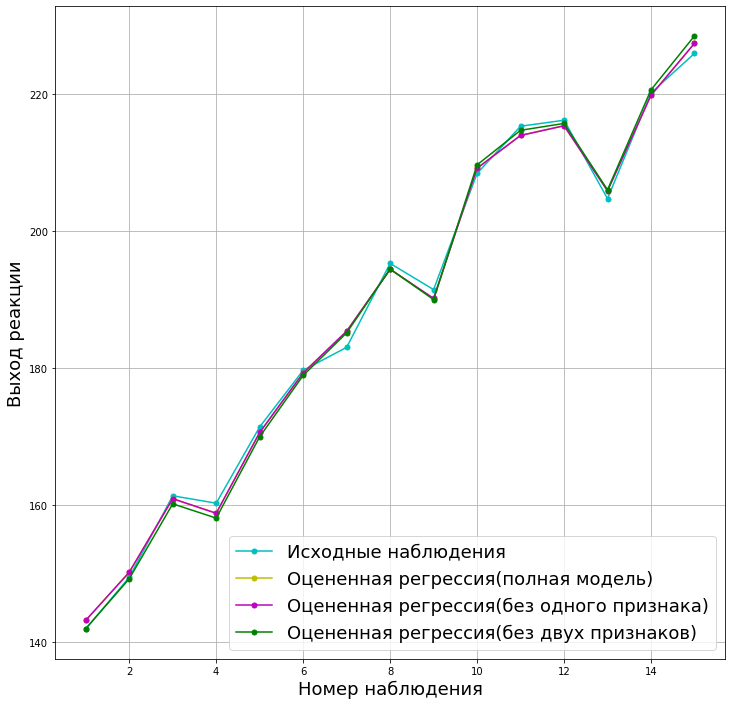

In [330]:
nums = np.arange(1, 16)

plt.figure(figsize=(12,12))
plt.plot(nums, y, '-o', markersize=5, color='c', label='Исходные наблюдения')
plt.plot(nums, y_est, '-o', markersize=5, color="y", label='Оцененная регрессия(полная модель)')
plt.plot(nums, cropped1_y_est, '-o', markersize=5, color='m', label='Оцененная регрессия(без одного признака)')
plt.plot(nums, cropped_y_est, '-o', markersize=5, color='g', label='Оцененная регрессия(без двух признаков)')
plt.grid()
plt.legend(fontsize=18)
plt.xlabel("Номер наблюдения", fontsize=18)
plt.ylabel("Выход реакции", fontsize=18)
plt.show()

Построим обобщенную доверительную область

In [332]:
cropped_t_quantile_turky = t.ppf(1 - alpha/(2*m), df=n - m + 2)
# print(f"Значение квантиля уровня {1 - alpha/(2*m)} распределения Стьюдента: {cropped_t_quantile_turky}")
cropped_a_intervals_turky_l = np.array([cropped_a_est - cropped_s_i*cropped_t_quantile_turky])[0]
cropped_a_intervals_turky_r = np.array([cropped_a_est + cropped_s_i*cropped_t_quantile_turky])[0]
print("Обобщенная доверительная область(без 2го и 4го коэффициента)")
print(f"Значение квантиля уровня {1 - alpha/(2*m)} распределения Стьюдента: {cropped_t_quantile_turky}")
for i in range(m-2):
    print(f"{i+1}-й коэффициент: [{cropped_a_intervals_turky_l[i]}, {cropped_a_intervals_turky_r[i]}]")

cropped1_t_quantile_turky = t.ppf(1 - alpha/(2*m), df=n - m + 1)
# print(f"\nЗначение квантиля уровня {1 - alpha/(2*m)} распределения Стьюдента: {cropped1_t_quantile_turky}")
cropped1_a_intervals_turky_l = np.array([cropped1_a_est - cropped1_s_i*cropped1_t_quantile_turky])[0]
cropped1_a_intervals_turky_r = np.array([cropped1_a_est + cropped1_s_i*cropped1_t_quantile_turky])[0]
print("\nОбобщенная доверительная область(без 2го коэффициента)")
print(f"Значение квантиля уровня {1 - alpha/(2*m)} распределения Стьюдента: {cropped1_t_quantile_turky}")
for i in range(m-1):
    print(f"{i+2 if i>1 else i+1}-й коэффициент: [{cropped1_a_intervals_turky_l[i]}, {cropped1_a_intervals_turky_r[i]}]")
    
cropped_1_t_quantile_turky = t.ppf(1 - alpha/(2*m), df=n - m + 1)
# print(f"\nЗначение квантиля уровня {1 - alpha/(2*m)} распределения Стьюдента: {cropped_1_t_quantile_turky}")
cropped_1_a_intervals_turky_l = np.array([cropped_1_a_est - cropped_1_s_i*cropped_1_t_quantile_turky])[0]
cropped_1_a_intervals_turky_r = np.array([cropped_1_a_est + cropped_1_s_i*cropped_1_t_quantile_turky])[0]
print("\nОбобщенная доверительная область(без 4го коэффициента)")
print(f"Значение квантиля уровня {1 - alpha/(2*m)} распределения Стьюдента: {cropped_1_t_quantile_turky}")
for i in range(m-1):
    print(f"{i+1}-й коэффициент: [{cropped_1_a_intervals_turky_l[i]}, {cropped_1_a_intervals_turky_r[i]}]")

Обобщенная доверительная область(без 2го и 4го коэффициента)
Значение квантиля уровня 0.9875 распределения Стьюдента: 2.5326378146335955
1-й коэффициент: [0.37641703976799373, 0.46551295619818506]
2-й коэффициент: [2.867382377563025, 5.658774840698264]

Обобщенная доверительная область(без 2го коэффициента)
Значение квантиля уровня 0.9875 распределения Стьюдента: 2.5600329593015543
1-й коэффициент: [0.37553358242554796, 0.45723394782652343]
2-й коэффициент: [2.641302554689167, 5.28559577239964]
4-й коэффициент: [-1.2737375204917463, 11.01894674096604]

Обобщенная доверительная область(без 4го коэффициента)
Значение квантиля уровня 0.9875 распределения Стьюдента: 2.5600329593015543
1-й коэффициент: [0.36963711745126393, 0.4541305971490496]
2-й коэффициент: [-0.020421834911961825, 0.16496809352532504]
3-й коэффициент: [2.4645585313715923, 5.22576127050276]


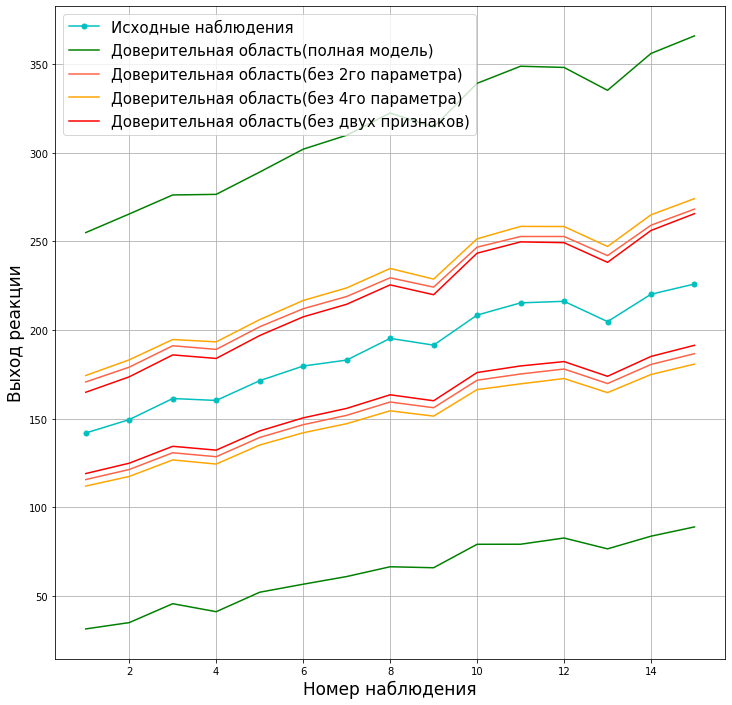

In [333]:
nums = np.arange(1, 16)
cropped_y_up = cropped_X.dot(cropped_a_intervals_turky_r)
cropped_y_low = cropped_X.dot(cropped_a_intervals_turky_l)
cropped1_y_up = cropped1_X.dot(cropped1_a_intervals_turky_r)
cropped1_y_low = cropped1_X.dot(cropped1_a_intervals_turky_l)
cropped_1_y_up = cropped_1_X.dot(cropped_1_a_intervals_turky_r)
cropped_1_y_low = cropped_1_X.dot(cropped_1_a_intervals_turky_l)

plt.figure(figsize=(12,12))
plt.plot(nums, y, '-o', markersize=5, color='c', label="Исходные наблюдения")
plt.plot(nums, y_up, color='g', label="Доверительная область(полная модель)")
plt.plot(nums, y_low, color='g')
plt.plot(nums, cropped1_y_up, color='tomato', label="Доверительная область(без 2го параметра)")
plt.plot(nums, cropped1_y_low, color='tomato')
plt.plot(nums, cropped_1_y_up, color='orange', label="Доверительная область(без 4го параметра)")
plt.plot(nums, cropped_1_y_low, color='orange')
plt.plot(nums, cropped_y_up, color='r', label="Доверительная область(без двух признаков)")
plt.plot(nums, cropped_y_low, color='r')
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Номер наблюдения", fontsize=17)
plt.ylabel("Выход реакции", fontsize=17)
plt.show()

### Прогноз наблюдения

In [342]:
# random.seed(0)
ind = random.randint(0,14)
# ind = 1
print(f"Построим прогноз для {ind}-го наблюдения\n")

x_real, y_real = X[ind, :], y[ind]
X_, y_ = np.delete(X, ind, 0), np.delete(y, ind)
# print(X_.shape, y_.shape)

print("Полная модель(4 параметра):")
xTx_inv = np.linalg.inv(X_.T.dot(X_))
a = xTx_inv.dot(X_.T).dot(y_)
# print(x_real.T.dot(a))
a = np.matmul(np.linalg.inv(np.matmul(X_.T,X_)),X_.T).dot(y_)
y_pred = x_real.T.dot(a)
print(f"Прогноз выхода реакции: {y_pred}; исходное наблюдение: {y_real}; отклонение: {np.abs(y_pred - y_real)}")

y_est_ = X_.dot(a)
# print((y_ - y_est_).T.dot(y_ - y_est_)/(X_.shape[0] - X_.shape[1]))
s_2_est_ = sum((y_[i] - y_est_[i])**2 for i in range(n-1)) / (n - 1 - m)
# print("\n",s_2_est * (x_real.T.dot(np.linalg.inv(X_.T.dot(X_))).dot(x_real)+1))
s_t = s_2_est_ * (np.matmul(np.matmul(x_real.T, (np.linalg.inv(np.matmul(X_.T,X_)))),x_real) + 1)
# print(s_t)
print("Оценка дисперсии:", s_2_est_)

t_quantile_ = t.ppf(1 - alpha, df=n - 1 - m)
# print(f"Значение квантиля уровня {1-alpha} распределения Стьюдента: {t_quantile_}")
y_intervals_l = y_pred - s_t**0.5*t_quantile_
y_intervals_r = y_pred + s_t**0.5*t_quantile_
print("\nИнтервальная оценка прогноза:")
print(f"Прогноз выхода реакции: {y_pred}: [{y_intervals_l}, {y_intervals_r}]")
print("=======================================================================================================================")

print("\n\nМодель без 2го и 4го коэффициента:")
# x_real2 = X_[ind, [0,2]]
x_real2 = x_real[[0,2]]

# print(x_real2, x_real[[0,2]])
X_2 = X_[:, [0,2]]

xTx_inv = np.linalg.inv(X_2.T.dot(X_2))
a2 = xTx_inv.dot(X_2.T).dot(y_)
# print(x_real2.T.dot(a2))
a2 = np.matmul(np.linalg.inv(np.matmul(X_2.T,X_2)),X_2.T).dot(y_)
y_pred2 = x_real2.T.dot(a2)
print(f"Прогноз выхода реакции: {y_pred2}; исходное наблюдение: {y_real}; отклонение: {np.abs(y_pred2 - y_real)}")

y_est_2 = X_2.dot(a2)
s_2_est_2 = sum((y_[i] - y_est_2[i])**2 for i in range(n-1)) / (n - 1 - m + 2)
s_t2 = s_2_est_2 * (np.matmul(np.matmul(x_real2.T, (np.linalg.inv(np.matmul(X_2.T,X_2)))),x_real2) + 1)
print("Оценка дисперсии:", s_2_est_2)

t_quantile_2 = t.ppf(1 - alpha, df=n - 1 - m + 2)
# print(f"Значение квантиля уровня {1-alpha} распределения Стьюдента: {t_quantile_2}")
y_intervals_l2 = y_pred2 - s_t2**0.5*t_quantile_2
y_intervals_r2 = y_pred2 + s_t2**0.5*t_quantile_2
print("\nИнтервальная оценка прогноза:")
print(f"Прогноз выхода реакции: {y_pred2}: [{y_intervals_l2}, {y_intervals_r2}]")
print("=======================================================================================================================")

print("\n\nМодель без 2го коэффициента:")
# x_real1 = X_[ind, [0,2,3]]
x_real1 = x_real[[0,2,3]]
X_1 = X_[:, [0,2,3]]

xTx_inv = np.linalg.inv(X_1.T.dot(X_1))
a1 = xTx_inv.dot(X_1.T).dot(y_)
# print(x_real1.T.dot(a1))
a1 = np.matmul(np.linalg.inv(np.matmul(X_1.T,X_1)),X_1.T).dot(y_)
y_pred1 = x_real1.T.dot(a1)
print(f"Прогноз выхода реакции: {y_pred1}; исходное наблюдение: {y_real}; отклонение: {np.abs(y_pred1 - y_real)}")

y_est_1 = X_1.dot(a1)
s_2_est_1 = sum((y_[i] - y_est_1[i])**2 for i in range(n-1)) / (n - 1 - m + 1)
s_t1 = s_2_est_1 * (np.matmul(np.matmul(x_real1.T, (np.linalg.inv(np.matmul(X_1.T,X_1)))),x_real1) + 1)
print("Оценка дисперсии:", s_2_est_1)

t_quantile_1 = t.ppf(1 - alpha, df=n - 1 - m + 1)
# print(f"Значение квантиля уровня {1-alpha} распределения Стьюдента: {t_quantile_1}")
y_intervals_l1 = y_pred1 - s_t1**0.5*t_quantile_1
y_intervals_r1 = y_pred1 + s_t1**0.5*t_quantile_1
print("\nИнтервальная оценка прогноза:")
print(f"Прогноз выхода реакции: {y_pred1}: [{y_intervals_l1}, {y_intervals_r1}]")
print("=======================================================================================================================")

print("\n\nМодель без 4го коэффициента:")
# x_real3 = X_[ind, [0,1,2]]
x_real3 = x_real[[0,1,2]]
X_3 = X_[:, [0,1,2]]

xTx_inv = np.linalg.inv(X_3.T.dot(X_3))
a3 = xTx_inv.dot(X_3.T).dot(y_)
# print(x_real3.T.dot(a3))
a3 = np.matmul(np.linalg.inv(np.matmul(X_3.T,X_3)),X_3.T).dot(y_)
y_pred3 = x_real3.T.dot(a3)
print(f"Прогноз выхода реакции: {y_pred3}; исходное наблюдение: {y_real}; отклонение: {np.abs(y_pred3 - y_real)}")

y_est_3 = X_3.dot(a3)
s_2_est_3 = sum((y_[i] - y_est_3[i])**2 for i in range(n-1)) / (n - 1 - m + 1)
s_t3 = s_2_est_3 * (np.matmul(np.matmul(x_real3.T, (np.linalg.inv(np.matmul(X_3.T,X_3)))),x_real3) + 1)
print("Оценка дисперсии:", s_2_est_3)

t_quantile_3 = t.ppf(1 - alpha, df=n - 1 - m + 1)
# print(f"Значение квантиля уровня {1-alpha} распределения Стьюдента: {t_quantile_3}")
y_intervals_l3 = y_pred3 - s_t3**0.5*t_quantile_3
y_intervals_r3 = y_pred3 + s_t3**0.5*t_quantile_3
print("\nИнтервальная оценка прогноза:")
print(f"Прогноз выхода реакции: {y_pred3}: [{y_intervals_l3}, {y_intervals_r3}]")

Построим прогноз для 2-го наблюдения

Полная модель(4 параметра):
Прогноз выхода реакции: 160.55459937963485; исходное наблюдение: 161.30454999999998; отклонение: 0.7499506203651265
Оценка дисперсии: 1.948299396350666

Интервальная оценка прогноза:
Прогноз выхода реакции: 160.55459937963485: [158.090184222701, 163.0190145365687]


Модель без 2го и 4го коэффициента:
Прогноз выхода реакции: 160.05997593479086; исходное наблюдение: 161.30454999999998; отклонение: 1.2445740652091217
Оценка дисперсии: 2.0977256964415116

Интервальная оценка прогноза:
Прогноз выхода реакции: 160.05997593479086: [158.03843261152895, 162.08151925805277]


Модель без 2го коэффициента:
Прогноз выхода реакции: 160.82381148002807; исходное наблюдение: 161.30454999999998; отклонение: 0.48073851997190786
Оценка дисперсии: 1.7845962105202693

Интервальная оценка прогноза:
Прогноз выхода реакции: 160.82381148002807: [158.8583744439604, 162.78924851609574]


Модель без 4го коэффициента:
Прогноз выхода реакции: 160.5525